In [ ]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
retaildf = pd.read_csv('/content/new_retail_data.csv')
retaildf

#302010 rows × 30 columns

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


- Will start by selecting those columns that are relevant to the project and problem scope. After that will handle null values, perform any encoding if reqd, datatype conversion.
- This will the be followed by more EDA - need for feature engineering, feature selection, standardization or normalization before diving deeper into model building and testing!
- eg: demograph_df = retaildf[['Age', 'Gender', 'Income','Transaction_ID','Customer_ID','Country', 'Customer_Segment', 'Total_Purchases', 'Amount','Total_Amount']]

demograph_df.head()

## Data Cleaning
1. Null Values
2. Erroneous Data
3. Data Type Conversion Required?
4. Removing certain columns if reqd?

#### Coming back after first round of analysis - Look at it from a business point of view!

1. Do I need to do PCA or dimensionality reduction?
2. Feature Scaling?
3. Feature Engineering?

In [ ]:
missing_percentage = (retaildf.isnull().sum()/len(retaildf))*100
missing_percentage

distinct_entries = retaildf.nunique().sort_values(ascending=False)
print(distinct_entries)

Address             299329
Total_Amount        299305
Amount              299297
Phone               299295
Transaction_ID      294461
Name                159390
Zipcode              93978
Customer_ID          86766
Time                 83677
Email                52897
Date                   366
products               318
City                   130
State                   54
Age                     53
Product_Type            33
Product_Brand           18
Month                   12
Total_Purchases         10
Product_Category         5
Ratings                  5
Country                  5
Payment_Method           4
Order_Status             4
Feedback                 4
Income                   3
Shipping_Method          3
Customer_Segment         3
Gender                   2
Year                     2
dtype: int64


 The percentage of missing values is very, very low compared to the total number of rows.
At this point it would be right to simply remove them

Columns thatshould be deletd - Transaction ID,


In [ ]:
columns_with_na = ['Address','Date','Total_Amount','Amount','Transaction_ID','Customer_ID','Name','Email','Phone','Zipcode']

retaildf.dropna(subset=columns_with_na, inplace=True)

#Importing the reqd library, pacakage for imputation
from sklearn.impute import SimpleImputer

#Imputing Columns

# Fill NaN with 0 for 'Date'
retaildf['Date'].fillna('0', inplace=True)

# Impute based on related columns
# Impute 'Products' based on 'Product_Category'
# to fill missing values in the products column based on the most frequent products value within each Product_Category
retaildf['products'].fillna(retaildf.groupby('Product_Category')['products'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'City' based on 'State'
retaildf['City'].fillna(retaildf.groupby('State')['City'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'State' based on 'Country'
retaildf['State'].fillna(retaildf.groupby('Country')['State'].transform(lambda x: x.mode()[0]), inplace = True)

# Impute 'Product_Type' based on 'Product_Brand'
retaildf['Product_Type'].fillna(retaildf.groupby('Product_Brand')['Product_Type'].transform(lambda x: x.mode()[0]), inplace=True)

# Impute 'Product_Brand' based on 'Product_Type'
retaildf['Product_Brand'].fillna(retaildf.groupby('Product_Type')['Product_Brand'].transform(lambda x: x.mode()[0]), inplace=True)

#Imputer 'Month' based on 'Date' if it isn't null otherwise by the most popular month
popular_month = retaildf['Month'].mode()[0]
retaildf['Month'] = retaildf.apply(lambda row: row['Month'] if pd.notnull(row['Date']) else popular_month, axis=1)




In [ ]:
#To impute non-numeric, categorical data from the rest of the columns ↓

numerical_columns = ['Age', 'Total_Purchases', 'Ratings']
mean_imputer = SimpleImputer(strategy='mean')
retaildf[numerical_columns] = mean_imputer.fit_transform(retaildf[numerical_columns])

# Impute categorical columns with mode
categorical_columns = ['Product_Category', 'Country', 'Payment_Method',
                       'Order_Status', 'Feedback', 'Shipping_Method',
                       'Customer_Segment', 'Gender', 'Income']

for col in categorical_columns:
    retaildf[col].fillna(retaildf[col].mode()[0], inplace=True)

new_missing_percentage = (retaildf.isnull().sum()/len(retaildf))*100
new_missing_percentage

,0
Transaction_ID,0.000000
Customer_ID,0.000000
Name,0.000000
Email,0.000000
Phone,0.000000
Address,0.000000
City,0.000000
State,0.000335
Zipcode,0.000000
Country,0.000000


We've handled the missing values fairly well, and whatever is still left we can drop it since it is a very small portion of the dataset.

In [ ]:
'''state_mode = retaildf['State'].mode()[0]
retaildf['State'].fillna(state_mode, inplace=True)

income_mode = retaildf['Income'].mode()[0]
retaildf['Income'].fillna(income_mode, inplace=True)
'''
year_mode = retaildf['Year'].mode()[0]
retaildf['Year'].fillna(year_mode, inplace=True)

time_mode = retaildf['Time'].mode()[0]
retaildf['Time'].fillna(time_mode, inplace=True)

month_mode = retaildf['Month'].mode()[0]
retaildf['Month'].fillna(month_mode, inplace=True)

retaildf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298577 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    298577 non-null  float64
 1   Customer_ID       298577 non-null  float64
 2   Name              298577 non-null  object 
 3   Email             298577 non-null  object 
 4   Phone             298577 non-null  float64
 5   Address           298577 non-null  object 
 6   City              298577 non-null  object 
 7   State             298576 non-null  object 
 8   Zipcode           298577 non-null  float64
 9   Country           298577 non-null  object 
 10  Age               298577 non-null  float64
 11  Gender            298577 non-null  object 
 12  Income            298577 non-null  object 
 13  Customer_Segment  298577 non-null  object 
 14  Date              298577 non-null  object 
 15  Year              298577 non-null  float64
 16  Month             298577 

In [ ]:
import datetime

# List of columns to convert to int
columns_to_int = ['Transaction_ID', 'Customer_ID', 'Phone', 'Zipcode', 'Age', 'Total_Purchases', 'Ratings']

# Convert the columns to int
for column in columns_to_int:
    retaildf[column] = retaildf[column].astype(int)

retaildf['Total_Amount'] = retaildf['Total_Amount'].astype(float).round(2)
retaildf['Amount'] = retaildf['Amount'].astype(float).round(2)

#time related columns
retaildf['Year'] = retaildf['Year'].astype(int)
#retaildf['Month'] = retaildf['Month'].astype(int) - string values: Jan - Dec

retaildf['Date'] = pd.to_datetime(retaildf['Date'])
#retaildf['Time'] = pd.to_timedelta(retaildf['Time'])

# Display the first few rows to check the conversion
retaildf.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985,Germany,...,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071,UK,...,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,New South Wales,75929,Australia,...,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420,Canada,...,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,England,48704,UK,...,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies


# Issue with incorrect product categiry mappings

In [ ]:
#Noticed some of the brands were placed under an incorrect category
category_brand_type =  retaildf.groupby(['Product_Category', 'Product_Brand'])['Product_Type'].unique().reset_index()

# Display the results
print(category_brand_type)

# To get a count of product types for each category and brand
category_brand_type_count = retaildf.groupby(['Product_Category', 'Product_Brand', 'Product_Type']).size().reset_index(name='Count')

print("\nDetailed view with counts:")

   Product_Category      Product_Brand                          Product_Type
0             Books      HarperCollins      [Non-Fiction, Thriller, Fiction]
1             Books      Penguin Books    [Children's, Non-Fiction, Fiction]
2             Books       Random House    [Non-Fiction, Literature, Fiction]
3          Clothing             Adidas              [T-shirt, Shoes, Jacket]
4          Clothing               Nike              [Shorts, Shoes, T-shirt]
5          Clothing               Zara                 [Shirt, Dress, Jeans]
6       Electronics             Adidas              [Jacket, Shoes, T-shirt]
7       Electronics              Apple          [Tablet, Laptop, Smartphone]
8       Electronics  Bed Bath & Beyond          [Bathroom, Bedding, Kitchen]
9       Electronics           BlueStar                         [BlueStar AC]
10      Electronics          Coca-Cola            [Juice, Water, Soft Drink]
11      Electronics      HarperCollins      [Non-Fiction, Fiction, Thriller]

In [ ]:
# Mapping of brands to their correct categories
brand_category_map = {
    'Adidas': 'Clothing',
    'Nike': 'Clothing',
    'Zara': 'Clothing',
    'HarperCollins': 'Books',
    'Penguin Books': 'Books',
    'Random House': 'Books',
    'Apple': 'Electronics',
    'Bed Bath & Beyond': 'Home Decor',
    'BlueStar': 'Electronics',
    'Coca-Cola': 'Grocery',
    'Home Depot': 'Home Decor',
    'IKEA': 'Home Decor',
    'Mitsubhisi': 'Electronics',
    'Nestle': 'Grocery',
    'Pepsi': 'Grocery',
    'Samsung': 'Electronics',
    'Sony': 'Electronics',
    'Whirlpool': 'Electronics'
}

# Function to correct the category
def correct_category(row):
    brand = row['Product_Brand']
    if brand in brand_category_map:
        return brand_category_map[brand]
    return row['Product_Category']

# Apply the correction
retaildf['Corrected_Category'] = retaildf.apply(correct_category, axis=1)

# Display the rows where corrections were made
corrections = retaildf[retaildf['Product_Category'] != retaildf['Corrected_Category']]

# Update the original Product_Category column
retaildf['Product_Category'] = retaildf['Corrected_Category']

# Remove the temporary Corrected_Category column
retaildf = retaildf.drop('Corrected_Category', axis=1)

# Verify the changes
print("\nUpdated categorizations:")
print(retaildf[['Product_Category', 'Product_Brand', 'Product_Type']])

# Count of corrected entries
corrected_count = len(corrections)
print(f"\nNumber of entries corrected: {corrected_count}")

# Optional: If you want to see the detailed view with counts again
category_brand_type_count = retaildf.groupby(['Product_Category', 'Product_Brand', 'Product_Type']).size().reset_index(name='Count')
print("\nDetailed view with counts:")
print(category_brand_type_count)



Updated categorizations:
       Product_Category  Product_Brand Product_Type
0              Clothing           Nike       Shorts
1           Electronics        Samsung       Tablet
2                 Books  Penguin Books   Children's
3            Home Decor     Home Depot        Tools
4               Grocery         Nestle    Chocolate
...                 ...            ...          ...
302005            Books  Penguin Books      Fiction
302006      Electronics          Apple       Laptop
302007         Clothing         Adidas       Jacket
302008       Home Decor           IKEA    Furniture
302009       Home Decor     Home Depot  Decorations

[298577 rows x 3 columns]

Number of entries corrected: 234

Detailed view with counts:
   Product_Category      Product_Brand                        Product_Type  \
0             Books      HarperCollins                             Fiction   
1             Books      HarperCollins                         Non-Fiction   
2             Books      Ha

#Issue with date, month and year columns

Month
April        36137
August       29370
December     18112
February       285
January      15043
July         27723
June         17594
March        18348
May          25654
November     17586
October      18321
September    17873
Name: count, dtype: int64
Month
April           3
August          3
February    22343
January     24606
July            1
Name: count, dtype: int64
       Month  Year       Date
4    January  2024 2024-01-10
8    January  2024 2024-01-06
12   January  2024 2024-01-02
18  February  2024 2024-02-07
22  February  2024 2024-02-03
24  February  2024 2024-02-27
27   January  2024 2024-01-07
30  February  2024 2024-02-06
37  February  2024 2024-02-16
38  February  2024 2024-02-08


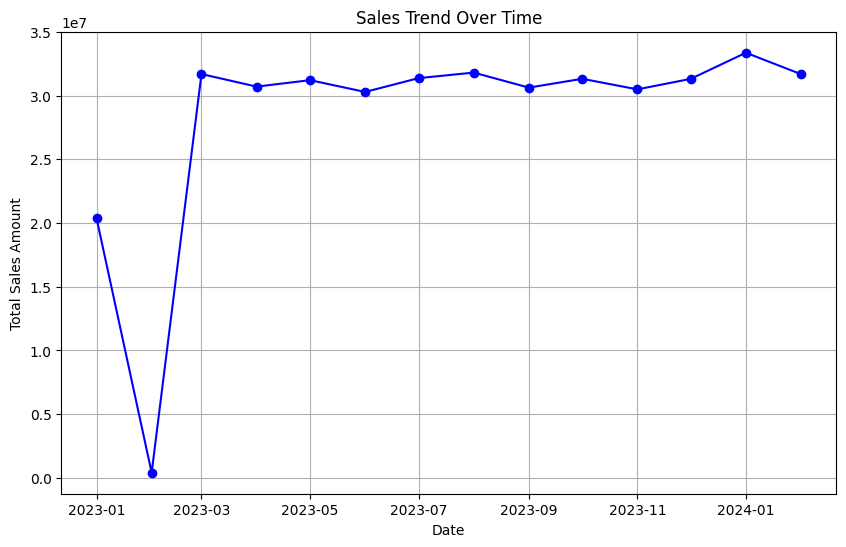

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange

# Ensure 'Date' is in datetime format
retaildf['Date'] = pd.to_datetime(retaildf['Date'], errors='coerce')

# Filter for records from 2023
subset_2023 = retaildf[(retaildf['Date'] >= '2023-01-01') & (retaildf['Date'] <= '2023-12-31')]

# Filter for records from January 2024 to February 2024
subset_2024 = retaildf[(retaildf['Date'] >= '2024-01-01') & (retaildf['Date'] <= '2024-02-28')]

# Get the value counts for each month in subset_2023
date_counts_2023 = subset_2023['Month'].value_counts().sort_index()
print(date_counts_2023)

# Get the value counts for each month in subset_2024
date_counts_2024 = subset_2024['Month'].value_counts().sort_index()
print(date_counts_2024)

# Correcting the Date column for 2023
def correct_date(row):
    if row['Year'] == 2023 and row['Month'] in ['January', 'February']:
        month_num = pd.to_datetime(row['Month'], format='%B').month
        day = (row.name % monthrange(2023, month_num)[1]) + 1
        return pd.Timestamp(f'2023-{str(month_num).zfill(2)}-{str(day).zfill(2)}')
    else:
        return row['Date']

# Apply the function to correct the Date column
retaildf['Date'] = retaildf.apply(correct_date, axis=1)

# Correcting the Month names for 2024
condition = (retaildf['Year'] == 2024) & (retaildf['Date'].dt.year == 2024)
retaildf.loc[condition, 'Month'] = retaildf['Date'].dt.strftime('%B')

# Verify the changes for Year = 2024
subset_df_monthyear_2024 = retaildf[['Month', 'Year', 'Date']][retaildf['Year'] == 2024]
print(subset_df_monthyear_2024.head(10))

# Convert 'Total_Amount' to numeric
retaildf['Total_Amount'] = pd.to_numeric(retaildf['Total_Amount'], errors='coerce')

# Group by Date and sum the total_amount
sales_trend = retaildf.groupby(retaildf['Date'].dt.to_period('M'))['Total_Amount'].sum()

# Convert the index back to datetime for plotting
sales_trend.index = sales_trend.index.to_timestamp()

# Plot the sales trend
plt.figure(figsize=(10, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

#Issue with duplicate Transaction IDs

In [ ]:
duplicates = retaildf[retaildf.duplicated(subset=['Transaction_ID'], keep=False)]
grouped = duplicates.groupby('Transaction_ID')

# Counter to limit the number of cases
counter = 0
max_cases = 3

for transaction_id, group in grouped:
    if counter >= max_cases:
        break
    print(f"\n## Transaction ID: {transaction_id}")
    print(group.to_string(index=False))
    print("\n" + "-"*80)
    counter += 1


#Resolving the issue of duplicate Transaction IDs
duplicates = retaildf[retaildf.duplicated('Transaction_ID', keep=False)]

# Display duplicates
print("Duplicates:")
print(duplicates.shape)

# Resolve duplicates by keeping the first occurrence (customize as needed)
retaildf = retaildf.drop_duplicates(subset='Transaction_ID', keep='first')

# Verify no duplicates remain
assert retaildf['Transaction_ID'].is_unique

print(f"Number of unique Transaction_IDs: {retaildf['Transaction_ID'].nunique()}")
print(f"Total number of rows: {len(retaildf)}")


## Transaction ID: 1003092
 Transaction_ID  Customer_ID                Name                Email      Phone                     Address       City       State  Zipcode Country  Age Gender Income Customer_Segment       Date  Year Month    Time  Total_Purchases  Amount  Total_Amount Product_Category     Product_Brand Product_Type Feedback Shipping_Method Payment_Method Order_Status  Ratings      products
        1003092        27378      Nicholas Moore Danielle79@gmail.com 6988330857 5564 Daniel Garden Apt. 073    Chicago Connecticut     6790     USA   34   Male    Low          Regular 2023-05-26  2023   May 7:06:21                2  262.46        524.91          Grocery             Pepsi        Water     Good        Standard         PayPal    Delivered        4 Bottled water
        1003092        97124 Yolanda Blankenship  Kristine9@gmail.com 2360380301         0933 Yolanda Island St. John's     Ontario     9692  Canada   23 Female    Low          Regular 2023-06-09  2023  June 1:59:0

The dataset has unique transaction IDs!

# Issue with Incorrect Country, City, State Mappings

In [ ]:
# Create dictionaries for mapping
city_state_map = {
    'San Francisco': 'California', 'Hamilton': 'Ontario', 'Dortmund': 'Berlin',
    'Albury-Wodonga': 'New South Wales', 'Oakland': 'California', 'Portsmouth': 'England',
    'Toowoomba': 'New South Wales', 'Calgary': 'Alberta', 'Raleigh': 'North Carolina',
    'Colorado Springs': 'Colorado', 'Kitchener': 'Ontario', 'Los Angeles': 'California',
    'Chicago': 'Illinois', 'Frankfurt': 'Hessen', 'Manchester': 'England',
    'Columbus': 'Ohio', 'Montreal': 'Quebec', 'London': 'England', 'Melbourne': 'Victoria',
    'Washington': 'District of Columbia', 'Charlotte': 'North Carolina', 'Sydney': 'New South Wales',
    'Minneapolis': 'Minnesota', 'Düsseldorf': 'North Rhine-Westphalia', 'Cologne': 'North Rhine-Westphalia',
    'Stuttgart': 'Baden-Württemberg', 'Belfast': 'Northern Ireland', 'Nottingham': 'England',
    'San Diego': 'California', 'Windsor': 'Ontario', 'Brisbane': 'Queensland',
    'Edinburgh': 'Scotland', 'Wuppertal': 'North Rhine-Westphalia', 'Canberra': 'Australian Capital Territory',
    'Newcastle upon Tyne': 'England', 'Bonn': 'North Rhine-Westphalia', 'Hull': 'England',
    'Cairns': 'Queensland', 'Leicester': 'England', 'Ballarat': 'Victoria',
    'Munich': 'Bavaria', 'Berlin': 'Berlin', 'Dresden': 'Saxony', 'Southampton': 'England',
    "St. John's": 'Newfoundland and Labrador', 'Hamburg': 'Hamburg', 'Barrie': 'Ontario',
    'Oxford': 'England', 'Boston': 'Massachusetts', 'New York': 'New York',
    'Hobart': 'Tasmania', 'Townsville': 'Queensland', 'Darwin': 'Northern Territory',
    'Birmingham': 'England', 'Wollongong': 'New South Wales', 'Newcastle': 'New South Wales',
    'Bremen': 'Bremen', 'Austin': 'Texas', 'Mackay': 'Queensland',
    'Ottawa': 'Ontario', 'Geelong': 'Victoria', 'Bochum': 'North Rhine-Westphalia',
    'Leeds': 'England', 'Edmonton': 'Alberta', 'Adelaide': 'South Australia',
    'Cleveland': 'Ohio', 'Fort Worth': 'Texas', 'Bielefeld': 'North Rhine-Westphalia',
    'Münster': 'North Rhine-Westphalia', 'Sheffield': 'South Yorkshire', 'Winnipeg': 'Manitoba',
    'Launceston': 'Tasmania', 'Brighton': 'East Sussex', 'Perth': 'Western Australia',
    'New Orleans': 'Louisiana', 'Liverpool': 'Merseyside', 'Seattle': 'Washington',
    'Atlanta': 'Georgia', 'San Antonio': 'Texas', 'Cardiff': 'Wales', 'Halifax': 'Nova Scotia',
    'Louisville': 'Kentucky', 'Mesa': 'Arizona', 'Quebec City': 'Quebec',
    'Saskatoon': 'Saskatchewan', 'Virginia Beach': 'Virginia', 'Houston': 'Texas',
    'Philadelphia': 'Pennsylvania', 'Plymouth': 'Devon', 'Toronto': 'Ontario',
    'Leipzig': 'Saxony', 'Gold Coast': 'Queensland', 'Kansas City': 'Missouri',
    'Vancouver': 'British Columbia', 'Miami': 'Florida', 'Tulsa': 'Oklahoma',
    'Kelowna': 'British Columbia', 'Hanover': 'Lower Saxony', 'Denver': 'Colorado',
    'Las Vegas': 'Nevada', 'San Jose': 'California', 'Phoenix': 'Arizona',
    'Nashville': 'Tennessee', 'Indianapolis': 'Indiana', 'Tucson': 'Arizona',
    'Essen': 'North Rhine-Westphalia', 'Fresno': 'California', 'Jacksonville': 'Florida',
    'Arlington': 'Texas', 'Glasgow': 'Scotland', 'Portland': 'Oregon', 'Baltimore': 'Maryland',
    'Sacramento': 'California', 'Memphis': 'Tennessee', 'Albuquerque': 'New Mexico',
    'Detroit': 'Michigan', 'Wichita': 'Kansas', 'Omaha': 'Nebraska', 'Bristol': 'Bristol',
    'Dallas': 'Texas', 'Milwaukee': 'Wisconsin'
}

state_country_map = {
    'Berlin': 'Germany', 'Ontario': 'Canada', 'New South Wales': 'Australia', 'Maine': 'USA',
    'England': 'UK', 'West Virginia': 'USA', 'South Carolina': 'USA', 'California': 'USA',
    'Connecticut': 'USA', 'Texas': 'USA', 'Idaho': 'USA', 'Louisiana': 'USA', 'Nevada': 'USA',
    'Utah': 'USA', 'Delaware': 'USA', 'Georgia': 'USA', 'Kansas': 'USA', 'Ohio': 'USA',
    'Minnesota': 'USA', 'North Dakota': 'USA', 'Indiana': 'USA', 'Washington': 'USA',
    'New Mexico': 'USA', 'South Dakota': 'USA', 'Michigan': 'USA', 'Illinois': 'USA',
    'North Carolina': 'USA', 'Oklahoma': 'USA', 'Missouri': 'USA', 'New York': 'USA',
    'Mississippi': 'USA', 'Tennessee': 'USA', 'Nebraska': 'USA', 'New Jersey': 'USA',
    'Arkansas': 'USA', 'Florida': 'USA', 'Massachusetts': 'USA', 'Vermont': 'USA',
    'Maryland': 'USA', 'Kentucky': 'USA', 'Alaska': 'USA', 'Alabama': 'USA', 'Arizona': 'USA',
    'Colorado': 'USA', 'Rhode Island': 'USA', 'Virginia': 'USA', 'Pennsylvania': 'USA',
    'Oregon': 'USA', 'Montana': 'USA', 'Wyoming': 'USA', 'New Hampshire': 'USA',
    'Wisconsin': 'USA', 'Hawaii': 'USA', 'Iowa': 'USA'
}

# Apply the mappings to fill in the correct states and countries
retaildf['State'] = retaildf['City'].map(city_state_map)
retaildf['Country'] = retaildf['State'].map(state_country_map)

# View the updated DataFrame
print(retaildf.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0         8691788        37249  Michelle Harrington    Ebony39@gmail.com   
1         2174773        69749          Kelsey Hill     Mark36@gmail.com   
2         6679610        30192         Scott Jensen    Shane85@gmail.com   
3         7232460        62101        Joseph Miller     Mary34@gmail.com   
4         4983775        27901        Debra Coleman  Charles30@gmail.com   

        Phone                      Address        City     State  Zipcode  \
0  1414786801            3959 Amanda Burgs    Dortmund    Berlin    77985   
1  6852899987           82072 Dawn Centers  Nottingham   England    99071   
2  8362160449            4133 Young Canyon     Geelong  Victoria    75929   
3  2776751724  8148 Thomas Creek Suite 100    Edmonton   Alberta    88420   
4  9098267635    5813 Lori Ports Suite 269     Bristol   Bristol    48704   

   Country  ...  Total_Amount Product_Category  Product_Brand Product_Type  \
0 

<ipython-input-45-3042ca188770>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retaildf['State'] = retaildf['City'].map(city_state_map)
<ipython-input-45-3042ca188770>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retaildf['Country'] = retaildf['State'].map(state_country_map)


In [ ]:
retaildf.iloc[0:5, 0:20]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.03
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071,UK,19,Female,Low,Premium,2023-12-31,2023,December,8:42:04,2,403.35
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,Victoria,75929,NaN,48,Male,Low,Regular,2023-04-26,2023,April,4:06:29,3,354.48
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Alberta,88420,NaN,56,Male,High,Premium,2023-05-08,2023,May,14:55:17,7,352.41
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,Bristol,48704,NaN,22,Male,Low,Premium,2024-01-10,2024,January,16:54:07,2,124.28


In [ ]:
null_country_rows = retaildf[retaildf['Country'].isnull()]

null_country_rows.iloc[0:11,0:12] #130854

#need to map countries with NaN values based on the city and/OR state!

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,Victoria,75929,NaN,48,Male
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Alberta,88420,NaN,56,Male
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,Bristol,48704,NaN,22,Male
5,6095326,41289,Ryan Johnson,Haley12@gmail.com,3292677006,532 Ashley Crest Suite 014,Brisbane,Queensland,74430,NaN,58,Female
7,2344675,26603,Angela Fields,Tanya94@gmail.com,3668096144,237 Young Curve,Munich,Bavaria,86862,NaN,29,Male
9,4926148,31878,Lori Bell,Jessica33@gmail.com,6004895059,6225 William Lodge,Cologne,North Rhine-Westphalia,64317,NaN,25,Male
17801,3680043,78484,Mr. Zachary Marks,Tyler6@gmail.com,2831499082,085 Nguyen Highway,Cologne,North Rhine-Westphalia,49173,NaN,19,Female
17804,9221549,42161,Brianna Hoffman,Andrew10@gmail.com,2085758759,30610 Bennett Views Suite 090,Cardiff,Wales,80765,NaN,19,Male
17805,7498247,52384,Jennifer Collins,Deanna69@gmail.com,3376660524,034 Jimenez Shoals Apt. 416,Glasgow,Scotland,41051,NaN,19,Male
17810,5206426,66989,Angel Fitzpatrick,Evan31@gmail.com,7490023454,548 Gonzalez Camp,Leipzig,Saxony,95501,NaN,19,Male


In [ ]:
null_country_rows = retaildf[retaildf['Country'].isnull()]

# Identify unique cities and states with NaN countries
unique_cities = null_country_rows['City'].unique()
unique_states = null_country_rows['State'].unique()

# Create a mapping dictionary
city_to_country = {
    # Germany
    "Berlin": "Germany",
    "Dortmund": "Germany",
    "Munich": "Germany",
    "Frankfurt": "Germany",
    "Düsseldorf": "Germany",
    "Cologne": "Germany",
    "Stuttgart": "Germany",
    "Bonn": "Germany",
    "Nuremberg": "Germany",
    "Hamburg": "Germany",
    "Bremen": "Germany",
    "Essen": "Germany",
    "Duisburg": "Germany",
    "Dresden": "Germany",
    "Leipzig": "Germany",
    "Hanover": "Germany",
    "Wuppertal": "Germany",
    "Bielefeld": "Germany",
    "Münster": "Germany",
    "Bochum": "Germany",

    # Canada
    "Hamilton": "Canada",
    "Kitchener": "Canada",
    "Toronto": "Canada",
    "Ottawa": "Canada",
    "Windsor": "Canada",
    "Oshawa": "Canada",
    "Barrie": "Canada",
    "Montreal": "Canada",
    "Quebec City": "Canada",
    "Calgary": "Canada",
    "Edmonton": "Canada",
    "Vancouver": "Canada",
    "Victoria": "Canada",
    "Kelowna": "Canada",
    "Winnipeg": "Canada",
    "Halifax": "Canada",
    "Saskatoon": "Canada",
    "Regina": "Canada",
    "St. John's": "Canada",

    # Australia
    "Albury-Wodonga": "Australia",
    "Sydney": "Australia",
    "Newcastle": "Australia",
    "Wollongong": "Australia",
    "Melbourne": "Australia",
    "Geelong": "Australia",
    "Ballarat": "Australia",
    "Bendigo": "Australia",
    "Brisbane": "Australia",
    "Townsville": "Australia",
    "Cairns": "Australia",
    "Mackay": "Australia",
    "Toowoomba": "Australia",
    "Gold Coast": "Australia",
    "Adelaide": "Australia",
    "Perth": "Australia",
    "Hobart": "Australia",
    "Launceston": "Australia",
    "Darwin": "Australia",
    "Canberra": "Australia",

    # USA
    "San Francisco": "USA",
    "Oakland": "USA",
    "Los Angeles": "USA",
    "San Diego": "USA",
    "Long Beach": "USA",
    "San Jose": "USA",
    "Sacramento": "USA",
    "Fresno": "USA",
    "Austin": "USA",
    "Houston": "USA",
    "Dallas": "USA",
    "San Antonio": "USA",
    "Fort Worth": "USA",
    "New York": "USA",
    "Chicago": "USA",
    "Philadelphia": "USA",
    "Phoenix": "USA",
    "Mesa": "USA",
    "Tucson": "USA",
    "Columbus": "USA",
    "Cleveland": "USA",
    "Detroit": "USA",
    "Atlanta": "USA",
    "Charlotte": "USA",
    "Raleigh": "USA",
    "Seattle": "USA",
    "Boston": "USA",
    "Baltimore": "USA",
    "Virginia Beach": "USA",
    "Miami": "USA",
    "Jacksonville": "USA",
    "Denver": "USA",
    "Colorado Springs": "USA",
    "Indianapolis": "USA",
    "Nashville": "USA",
    "Memphis": "USA",
    "Kansas City": "USA",
    "Milwaukee": "USA",
    "Minneapolis": "USA",
    "Portland": "USA",
    "New Orleans": "USA",
    "Louisville": "USA",
    "Birmingham": "USA",
    "Oklahoma City": "USA",
    "Tulsa": "USA",
    "Albuquerque": "USA",
    "Las Vegas": "USA",
    "Omaha": "USA",
    "Wichita": "USA",

    # UK
    "London": "UK",
    "Manchester": "UK",
    "Birmingham": "UK",
    "Leeds": "UK",
    "Liverpool": "UK",
    "Newcastle upon Tyne": "UK",
    "Sheffield": "UK",
    "Bristol": "UK",
    "Nottingham": "UK",
    "Leicester": "UK",
    "Southampton": "UK",
    "Portsmouth": "UK",
    "Oxford": "UK",
    "Brighton": "UK",
    "Plymouth": "UK",
    "Hull": "UK",
    "Edinburgh": "UK",
    "Glasgow": "UK",
    "Cardiff": "UK",
    "Belfast": "UK"
}

state_to_country= {
    'Berlin': 'Germany', 'Ontario': 'Canada', 'New South Wales': 'Australia', 'Maine': 'USA',
    'England': 'UK', 'West Virginia': 'USA', 'South Carolina': 'USA', 'California': 'USA',
    'Connecticut': 'USA', 'Texas': 'USA', 'Idaho': 'USA', 'Louisiana': 'USA', 'Nevada': 'USA',
    'Utah': 'USA', 'Delaware': 'USA', 'Georgia': 'USA', 'Kansas': 'USA', 'Ohio': 'USA',
    'Minnesota': 'USA', 'North Dakota': 'USA', 'Indiana': 'USA', 'Washington': 'USA',
    'New Mexico': 'USA', 'South Dakota': 'USA', 'Michigan': 'USA', 'Illinois': 'USA',
    'North Carolina': 'USA', 'Oklahoma': 'USA', 'Missouri': 'USA', 'New York': 'USA',
    'Mississippi': 'USA', 'Tennessee': 'USA', 'Nebraska': 'USA', 'New Jersey': 'USA',
    'Arkansas': 'USA', 'Florida': 'USA', 'Massachusetts': 'USA', 'Vermont': 'USA',
    'Maryland': 'USA', 'Kentucky': 'USA', 'Alaska': 'USA', 'Alabama': 'USA', 'Arizona': 'USA',
    'Colorado': 'USA', 'Rhode Island': 'USA', 'Virginia': 'USA', 'Pennsylvania': 'USA',
    'Oregon': 'USA', 'Montana': 'USA', 'Wyoming': 'USA', 'New Hampshire': 'USA',
    'Wisconsin': 'USA', 'Hawaii': 'USA', 'Iowa': 'USA'
}

# Function to fill NaN values based on city and state
def fill_country(row):
    if pd.notnull(row['City']) and row['City'] in city_to_country:
        return city_to_country[row['City']]
    elif pd.notnull(row['State']) and row['State'] in state_to_country:
        return state_to_country[row['State']]
    else:
        return row['Country']  # Keep original if no mapping found

# Apply the function to fill NaN values
retaildf['Country'] = retaildf.apply(fill_country, axis=1)

In [ ]:
null_state_rows = retaildf[retaildf['State'].isnull()]

null_state_rows.iloc[0:11,0:12]    #15691
#need to map states with NaN values based on the city and/OR country!

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender
17863,5812154,99010,Paul Smith,Andrea88@gmail.com,7547330558,96214 Patrick Ferry Suite 618,Oshawa,NaN,23706,Canada,19,Male
17888,2849530,98104,Eric Rogers,Morgan41@gmail.com,3393751938,721 John Tunnel Apt. 675,Victoria,NaN,77870,Canada,19,Female
17893,5537976,51381,Anthony Gibson,Natalie83@gmail.com,9175183343,207 Benjamin Knolls,Victoria,NaN,67788,Canada,19,Female
17901,5627711,24419,Sarah Palmer,Cindy99@gmail.com,9690741314,198 Sherry Mill,Regina,NaN,84592,Canada,19,Male
17913,8437218,53429,Gregory Cooper,Robert22@gmail.com,9965769295,134 Baker Curve,Long Beach,NaN,4426,USA,19,Female
17917,9832012,75747,Michael Rodriguez,Eric32@gmail.com,3642872036,6518 Zachary Valley Apt. 722,Nuremberg,NaN,11265,Germany,19,Female
17923,5735912,35493,Kristen Smith,Phillip39@gmail.com,4209609688,8399 Johnson Shoals,Duisburg,NaN,30501,Germany,19,Female
17932,6350652,62759,Richard Gordon,Stephen98@gmail.com,5798113155,68592 Johnson Manor,Bendigo,NaN,17271,Australia,19,Female
17937,2127128,19784,Kimberly Dean,Teresa18@gmail.com,1134138128,584 Courtney Falls Suite 579,Duisburg,NaN,61184,Germany,19,Female
17938,7163976,33565,Joseph Russell,Ronnie64@gmail.com,8993216843,80118 Brooks Shores,Regina,NaN,98980,Canada,19,Male


In [ ]:
retaildf.iloc[0:5, 20:30]

,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
1,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab
2,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment
3,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife
4,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1,Chocolate cookies


Now that we have corrected the data - handled missing values, we will prepare it for high-level analysis and proper dashboarding!
Steps involve:

1. Filter based on Country and Product Category - so we will create a subset version of the dataset!
2. Edit the dataset to incorporate both transaction-based and customer-based approaches.

In [ ]:
null_state_rows = retaildf[retaildf['State'].isnull()]

# Identify unique cities with NaN states
unique_cities_with_null_state = null_state_rows['City'].unique()

# Create a mapping dictionary
# You need to manually fill this dictionary based on your knowledge or external data
city_to_state = {
    # Germany
    'Berlin': 'Berlin',
    'Dortmund': 'North Rhine-Westphalia',
    'Munich': 'Bavaria',
    'Frankfurt': 'Hesse',
    'Düsseldorf': 'North Rhine-Westphalia',
    'Cologne': 'North Rhine-Westphalia',
    'Stuttgart': 'Baden-Württemberg',
    'Bonn': 'North Rhine-Westphalia',
    'Nuremberg': 'Bavaria',
    'Hamburg': 'Hamburg',
    'Bremen': 'Bremen',
    'Essen': 'North Rhine-Westphalia',
    'Duisburg': 'North Rhine-Westphalia',
    'Dresden': 'Saxony',
    'Leipzig': 'Saxony',
    'Hanover': 'Lower Saxony',
    'Wuppertal': 'North Rhine-Westphalia',
    'Bielefeld': 'North Rhine-Westphalia',
    'Münster': 'North Rhine-Westphalia',
    'Bochum': 'North Rhine-Westphalia',

    # Canada
    'Hamilton': 'Ontario',
    'Kitchener': 'Ontario',
    'Toronto': 'Ontario',
    'Ottawa': 'Ontario',
    'Windsor': 'Ontario',
    'Oshawa': 'Ontario',
    'Barrie': 'Ontario',
    'Montreal': 'Quebec',
    'Quebec City': 'Quebec',
    'Calgary': 'Alberta',
    'Edmonton': 'Alberta',
    'Vancouver': 'British Columbia',
    'Victoria': 'British Columbia',
    'Kelowna': 'British Columbia',
    'Winnipeg': 'Manitoba',
    'Halifax': 'Nova Scotia',
    'Saskatoon': 'Saskatchewan',
    'Regina': 'Saskatchewan',
    "St. John's": 'Newfoundland and Labrador',

    # Australia
    'Albury-Wodonga': 'New South Wales',
    'Sydney': 'New South Wales',
    'Newcastle': 'New South Wales',
    'Wollongong': 'New South Wales',
    'Melbourne': 'Victoria',
    'Geelong': 'Victoria',
    'Ballarat': 'Victoria',
    'Bendigo': 'Victoria',
    'Brisbane': 'Queensland',
    'Townsville': 'Queensland',
    'Cairns': 'Queensland',
    'Mackay': 'Queensland',
    'Toowoomba': 'Queensland',
    'Gold Coast': 'Queensland',
    'Adelaide': 'South Australia',
    'Perth': 'Western Australia',
    'Hobart': 'Tasmania',
    'Launceston': 'Tasmania',
    'Darwin': 'Northern Territory',
    'Canberra': 'Australian Capital Territory',

    # USA
    'San Francisco': 'California',
    'Oakland': 'California',
    'Los Angeles': 'California',
    'San Diego': 'California',
    'Long Beach': 'California',
    'San Jose': 'California',
    'Sacramento': 'California',
    'Fresno': 'California',
    'Austin': 'Texas',
    'Houston': 'Texas',
    'Dallas': 'Texas',
    'San Antonio': 'Texas',
    'Fort Worth': 'Texas',
    'New York': 'New York',
    'Chicago': 'Illinois',
    'Philadelphia': 'Pennsylvania',
    'Phoenix': 'Arizona',
    'Mesa': 'Arizona',
    'Tucson': 'Arizona',
    'Columbus': 'Ohio',
    'Cleveland': 'Ohio',
    'Detroit': 'Michigan',
    'Atlanta': 'Georgia',
    'Charlotte': 'North Carolina',
    'Raleigh': 'North Carolina',
    'Seattle': 'Washington',
    'Boston': 'Massachusetts',
    'Baltimore': 'Maryland',
    'Virginia Beach': 'Virginia',
    'Miami': 'Florida',
    'Jacksonville': 'Florida',
    'Denver': 'Colorado',
    'Colorado Springs': 'Colorado',
    'Indianapolis': 'Indiana',
    'Nashville': 'Tennessee',
    'Memphis': 'Tennessee',
    'Kansas City': 'Missouri',
    'Milwaukee': 'Wisconsin',
    'Minneapolis': 'Minnesota',
    'Portland': 'Oregon',
    'New Orleans': 'Louisiana',
    'Louisville': 'Kentucky',
    'Birmingham': 'Alabama',
    'Oklahoma City': 'Oklahoma',
    'Tulsa': 'Oklahoma',
    'Albuquerque': 'New Mexico',
    'Las Vegas': 'Nevada',
    'Omaha': 'Nebraska',
    'Wichita': 'Kansas',

    # UK
    'London': 'England',
    'Manchester': 'England',
    'Birmingham': 'England',
    'Leeds': 'England',
    'Liverpool': 'England',
    'Newcastle upon Tyne': 'England',
    'Sheffield': 'England',
    'Bristol': 'England',
    'Nottingham': 'England',
    'Leicester': 'England',
    'Southampton': 'England',
    'Portsmouth': 'England',
    'Oxford': 'England',
    'Brighton': 'England',
    'Plymouth': 'England',
    'Hull': 'England',
    'Edinburgh': 'Scotland',
    'Glasgow': 'Scotland',
    'Cardiff': 'Wales',
    'Belfast': 'Northern Ireland'
}

# Function to fill NaN values based on city
def fill_state(row):
    if pd.notnull(row['City']) and row['City'] in city_to_state:
        return city_to_state[row['City']]
    else:
        return row['State']  # Keep original if no mapping found

# Apply the function to fill NaN values
retaildf['State'] = retaildf.apply(fill_state, axis=1)

# Verify the changes
print(retaildf[retaildf['State'].isnull()])

        Transaction_ID  Customer_ID              Name                 Email  \
30684          9846465        55807      Laura Hansen      Ryan26@gmail.com   
31082          3825499        87078    Michelle Stone     Wendy68@gmail.com   
31174          8735984        80539      Angela Eaton   Michael63@gmail.com   
31356          6258781        14770  Rebecca Campbell     Nathan2@gmail.com   
32569          5455513        42873   Ronald Pena Jr.   Mallory75@gmail.com   
...                ...          ...               ...                   ...   
296230         9290463        21172     David Jackson    Donald93@gmail.com   
296534         2611768        11760     Sandra Harvey  Kathleen23@gmail.com   
297048         3719812        97169    Morgan Johnson    Rodney62@gmail.com   
298147         5806544        20059       Wendy Allen   Danielle1@gmail.com   
298685         1008527        78408      Vernon Meyer    Kendra78@gmail.com   

             Phone                            Addre

#Reduced the majority null values in Country and State

In [ ]:
retaildf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289797 entries, 0 to 299656
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    289797 non-null  int64         
 1   Customer_ID       289797 non-null  int64         
 2   Name              289797 non-null  object        
 3   Email             289797 non-null  object        
 4   Phone             289797 non-null  int64         
 5   Address           289797 non-null  object        
 6   City              289797 non-null  object        
 7   State             289797 non-null  object        
 8   Zipcode           289797 non-null  int64         
 9   Country           289797 non-null  object        
 10  Age               289797 non-null  int64         
 11  Gender            289797 non-null  object        
 12  Income            289797 non-null  object        
 13  Customer_Segment  289797 non-null  object        
 14  Date     

In [ ]:
retaildf.dropna(subset=['State','Country'], inplace=True)



#Creating a subset of our data
Clothing

In [ ]:
clothing_df = retaildf[retaildf['Product_Category'] == 'Clothing']
clothing_df.iloc[0:6, 0:20]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,North Rhine-Westphalia,77985,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3,108.03
7,2344675,26603,Angela Fields,Tanya94@gmail.com,3668096144,237 Young Curve,Munich,Bavaria,86862,Germany,29,Male,Medium,Premium,2023-03-24,2023,March,10:12:56,1,46.59
14,2401331,98300,Andrew Guzman,Eric76@gmail.com,2923044936,470 Rodriguez Estate Suite 564,Portsmouth,England,5259,UK,32,Female,High,Regular,2023-11-18,2023,November,23:41:05,6,297.73
30,3413296,98256,Steven Boyd,Sheryl18@gmail.com,5248581519,1719 Christina Heights Apt. 614,Portsmouth,England,43602,UK,26,Female,Low,Regular,2024-02-06,2024,February,1:59:20,3,159.80
36,8783109,65305,Jonathan Jenkins,Christina19@gmail.com,8524180606,890 Brooks Pine,Portsmouth,England,68300,UK,19,Male,High,Regular,2023-12-12,2023,December,17:48:31,5,195.55
39,2458233,96840,Susan Thomas,Bonnie80@gmail.com,9540868010,48415 Ferguson Passage,Portsmouth,England,85074,UK,65,Male,Low,Regular,2023-10-29,2023,October,13:43:05,8,28.83


In [ ]:
clothing_df.iloc[0:6, 20:31]


,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
7,46.59,Clothing,Zara,Shirt,Bad,Same-Day,Cash,Processing,1,Dress shirt
14,1786.36,Clothing,Adidas,T-shirt,Bad,Same-Day,Cash,Shipped,1,V-neck tee
30,479.41,Clothing,Adidas,Shoes,Good,Same-Day,Debit Card,Pending,3,Running shoes
36,977.76,Clothing,Zara,Shirt,Good,Express,Credit Card,Pending,4,Henley shirt
39,230.60,Clothing,Adidas,Shoes,Excellent,Same-Day,Credit Card,Pending,4,Running shoes


The dataset has been filtered to only include the clothing product category! Now let's prepare a clean dataset!

In [ ]:
columns_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode']
clothing_df = clothing_df.drop(columns=columns_to_drop)

# Select relevant columns
relevant_columns = [
    'Transaction_ID', 'Customer_ID', 'Age', 'Gender', 'Income', 'Customer_Segment',
    'Date', 'Year', 'Month', 'Total_Purchases', 'Amount', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Ratings', 'Feedback', 'Shipping_Method',
    'Payment_Method', 'Order_Status','products', 'City', 'State','Country','Total_Amount'
]

clothing_df = clothing_df[relevant_columns]


In [ ]:
# Group the dataframe by 'Customer_ID' and then by 'Transaction_ID'
grouped_df = clothing_df.groupby(['Customer_ID', 'Transaction_ID'])

# To see the transactions a customer has made, you can iterate over the groups or display a sample
# Let's display a few rows from each group as an example
grouped_sample = grouped_df.first()

# Display the first few rows of the grouped data
grouped_sample.head(10)
#this datase has data integrity issues- for eg- multiple people have been given same customer ID!!!

Age  Gender  Income Customer_Segment       Date  \
Customer_ID Transaction_ID                                                    
10000       4340470          26    Male    High          Regular 2023-01-18   
10001       5025854          46  Female     Low          Regular 2023-10-09   
10003       4518045          24  Female  Medium          Regular 2023-07-17   
10006       1479952          23  Female    High          Regular 2023-07-11   
            3934671          23  Female    High          Regular 2024-02-14   
            5262562          51  Female  Medium          Regular 2024-01-16   
            8422912          46    Male     Low          Premium 2023-10-11   
10007       4896527          19    Male     Low              New 2024-01-02   
            6812749          35  Female  Medium          Regular 2023-05-30   
10008       5833556          26  Female    High          Regular 2024-02-06   

                            Year     Month  Total_Purchases  Amount  \
Customer_ID Transaction_ID                                            
10000       4340470         2023   January                5  299.74   
10001       5025854         2023   October                8  484.94   
10003       4518045         2023    August                9  210.08   
10006       1479952         2023      July                7   69.11   
            3934671         2024  February               10  338.32   
            5262562         2024   January                6  467.92   
            8422912         2023   October                3  146.98   
10007       4896527         2024   January                7  281.19   
            6812749         2023      July               10   90.04   
10008       5833556         2024  February                1  441.91   

                           Product_Category  ... Ratings   Feedback  \
Customer_ID Transaction_ID                   ...                      
10000       4340470                Clothing  ...       3       Good   
10001       5025854                Clothing  ...       5  Excellent   
10003       4518045                Clothing  ...       2    Average   
10006       1479952                Clothing  ...       4       Good   
            3934671                Clothing  ...       1        Bad   
            5262562                Clothing  ...       2    Average   
            8422912                Clothing  ...       5  Excellent   
10007       4896527                Clothing  ...       4  Excellent   
            6812749                Clothing  ...       4  Excellent   
10008       5833556                Clothing  ...       1        Bad   

                            Shipping_Method Payment_Method Order_Status  \
Customer_ID Transaction_ID                                                
10000       4340470                Same-Day           Cash    Delivered   
10001       5025854                Same-Day           Cash   Processing   
10003       4518045                Standard     Debit Card    Delivered   
10006       1479952                Standard         PayPal    Delivered   
            3934671                Same-Day     Debit Card      Shipped   
            5262562                Standard         PayPal   Processing   
            8422912                Same-Day         PayPal   Processing   
10007       4896527                 Express    Credit Card    Delivered   
            6812749                 Express    Credit Card    Delivered   
10008       5833556                Same-Day           Cash    Delivered   

                                 products           City           State  \
Customer_ID Transaction_ID                                                 
10000       4340470          Khaki shorts  San Francisco      California   
10001       5025854              Tank top        Hanover    Lower Saxony   
10003       4518045            High heels        Raleigh  North Carolina   
10006       1479952             Plain tee         Boston   Massachusetts   
            3934

In [ ]:
# Group by 'Customer_ID' and count unique 'Transaction_ID's for each customer
transaction_counts = clothing_df.groupby('Customer_ID')['Transaction_ID'].nunique()

# Filter customers who have more than one transaction
customers_with_multiple_transactions = transaction_counts[transaction_counts > 1]

# Print the customer IDs and their transaction counts
customers_with_multiple_transactions
# so there are 10764 customers who have made multiple transactions

,Transaction_ID
Customer_ID,
10006,4
10007,2
10010,2
10015,2
10022,3
...,...
99952,2
99962,2
99990,2


In [ ]:
# Count the occurrences of each Customer_ID
customer_id_counts = clothing_df['Customer_ID'].value_counts()

# Find Customer_IDs that appear more than once
duplicate_customer_ids = customer_id_counts[customer_id_counts > 1]

# Display duplicate Customer_IDs and their counts
print(duplicate_customer_ids)

Customer_ID
88982    6
79803    6
70915    6
56160    5
50799    5
        ..
94779    2
66015    2
78096    2
90740    2
93039    2
Name: count, Length: 10411, dtype: int64


In [ ]:
clothing_df.iloc[0:7,0:10]

,Transaction_ID,Customer_ID,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases
0,8691788,37249,21,Male,Low,Regular,2023-09-18,2023,September,3
7,2344675,26603,29,Male,Medium,Premium,2023-03-24,2023,March,1
14,2401331,98300,32,Female,High,Regular,2023-11-18,2023,November,6
30,3413296,98256,26,Female,Low,Regular,2024-02-06,2024,February,3
36,8783109,65305,19,Male,High,Regular,2023-12-12,2023,December,5
39,2458233,96840,65,Male,Low,Regular,2023-10-29,2023,October,8
44,3239367,62464,58,Female,High,Regular,2023-12-14,2023,December,3


In [ ]:
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None


In [ ]:
# Group by 'New_Customer_ID'
grouped = clothing_df.groupby('Customer_ID')

# Get the most common gender and customer segment
most_common_gender = grouped['Gender'].apply(mode)
most_common_segment = grouped['Customer_Segment'].apply(mode)

# Get the most recent age and income (using Transaction_Date for ordering if available)
# Assuming 'Transaction_Date' exists and is of datetime type
most_recent_age = grouped.apply(lambda x: x.sort_values(by='Date').iloc[-1]['Age'])
most_recent_income = grouped.apply(lambda x: x.sort_values(by='Date').iloc[-1]['Income'])

# Compile the results into a DataFrame
updated_info = pd.DataFrame({
    'Customer_ID': most_common_gender.index,
    'Most_Common_Gender': most_common_gender.values,
    'Most_Common_Segment': most_common_segment.values,
    'Most_Recent_Age': most_recent_age.values,
    'Most_Recent_Income': most_recent_income.values
})

print(updated_info.head())


   Customer_ID Most_Common_Gender Most_Common_Segment  Most_Recent_Age  \
0        10000               Male             Regular               26   
1        10001             Female             Regular               46   
2        10003             Female             Regular               24   
3        10006             Female             Regular               23   
4        10007             Female                 New               19   

  Most_Recent_Income  
0               High  
1                Low  
2             Medium  
3               High  
4                Low  


In [ ]:
# Merge the updated information back to the original dataframe
clothing_df_updated = clothing_df.merge(updated_info, on='Customer_ID', suffixes=('', '_Updated'))

# Replace the original columns with updated values
clothing_df_updated['Gender'] = clothing_df_updated['Most_Common_Gender']
clothing_df_updated['Customer_Segment'] = clothing_df_updated['Most_Common_Segment']
clothing_df_updated['Age'] = clothing_df_updated['Most_Recent_Age']
clothing_df_updated['Income'] = clothing_df_updated['Most_Recent_Income']

# Drop the helper columns used for merging
clothing_df_updated.drop(columns=['Most_Common_Gender', 'Most_Common_Segment', 'Most_Recent_Age', 'Most_Recent_Income'], inplace=True)

print(clothing_df_updated.head())


   Transaction_ID  Customer_ID  Age  Gender  Income Customer_Segment  \
0         8691788        37249   46    Male     Low              New   
1         4895457        37249   46    Male     Low              New   
2         2344675        26603   48  Female  Medium          Regular   
3         6774063        26603   48  Female  Medium          Regular   
4         7526592        26603   48  Female  Medium          Regular   

        Date  Year      Month  Total_Purchases  ...  Ratings   Feedback  \
0 2023-09-18  2023  September                3  ...        5  Excellent   
1 2023-12-08  2023   December                4  ...        5  Excellent   
2 2023-03-24  2023      March                1  ...        1        Bad   
3 2023-05-24  2023        May                3  ...        3       Good   
4 2023-01-09  2023    January               10  ...        5  Excellent   

  Shipping_Method Payment_Method  Order_Status        products  \
0        Same-Day     Debit Card       Shipped  Cy

In [ ]:

# Step 1: Define age groups
def age_group(age):
    if pd.isna(age):  # Handle missing values
        return 'Unknown'
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 65:
        return '56-65'
    else:
        return '65+'

clothing_df_updated['Age_Group'] = clothing_df_updated['Age'].apply(age_group)

age_distribution = clothing_df_updated['Age_Group'].value_counts().sort_index()

# Print the distribution
print("Age Group Distribution:")
print(age_distribution)

# Step 2: Define generation based on birth year
def get_generation(age):
    if pd.isna(age):  # Handle missing values
        return 'Unknown'
    current_year = pd.Timestamp.now().year
    birth_year = current_year - age

    if 2010 <= birth_year:
        return 'Generation Alpha'
    elif 1997 <= birth_year <= 2009:
        return 'Gen Z'
    elif 1981 <= birth_year <= 1996:
        return 'Millennial'
    elif 1965 <= birth_year <= 1980:
        return 'Gen X'
    elif 1946 <= birth_year <= 1964:
        return 'Boomer'
    elif 1928 <= birth_year <= 1945:
        return 'Silent Generation'
    else:
        return 'Greatest Generation'

clothing_df_updated['Generation'] = clothing_df_updated['Age'].apply(get_generation)

generation_distribution = clothing_df_updated['Generation'].value_counts().sort_index()

# Print the generation distribution
print("Generation Distribution:")
print(generation_distribution)


Age Group Distribution:
Age_Group
18-25    21817
26-35     8386
36-45     4641
46-55    10579
56-65     4761
65+       2398
Name: count, dtype: int64
Generation Distribution:
Generation
Boomer         5236
Gen X         13410
Gen Z         25001
Millennial     8935
Name: count, dtype: int64


In [ ]:
print(clothing_df_updated.head())

   Transaction_ID  Customer_ID  Age  Gender  Income Customer_Segment  \
0         8691788        37249   46    Male     Low              New   
1         4895457        37249   46    Male     Low              New   
2         2344675        26603   48  Female  Medium          Regular   
3         6774063        26603   48  Female  Medium          Regular   
4         7526592        26603   48  Female  Medium          Regular   

        Date  Year      Month  Total_Purchases  ...  Shipping_Method  \
0 2023-09-18  2023  September                3  ...         Same-Day   
1 2023-12-08  2023   December                4  ...          Express   
2 2023-03-24  2023      March                1  ...         Same-Day   
3 2023-05-24  2023        May                3  ...          Express   
4 2023-01-09  2023    January               10  ...         Same-Day   

  Payment_Method Order_Status        products            City  \
0     Debit Card      Shipped  Cycling shorts        Dortmund   
1   

In [ ]:
clothing_df_updated.iloc[0:7,0:20]

,Transaction_ID,Customer_ID,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Product_Category,Product_Brand,Product_Type,Ratings,Feedback,Shipping_Method,Payment_Method,Order_Status,products
0,8691788,37249,46,Male,Low,New,2023-09-18,2023,September,3,108.03,Clothing,Nike,Shorts,5,Excellent,Same-Day,Debit Card,Shipped,Cycling shorts
1,4895457,37249,46,Male,Low,New,2023-12-08,2023,December,4,148.64,Clothing,Zara,Shirt,5,Excellent,Express,Cash,Shipped,Polo shirt
2,2344675,26603,48,Female,Medium,Regular,2023-03-24,2023,March,1,46.59,Clothing,Zara,Shirt,1,Bad,Same-Day,Cash,Processing,Dress shirt
3,6774063,26603,48,Female,Medium,Regular,2023-05-24,2023,May,3,452.10,Clothing,Nike,T-shirt,3,Good,Express,PayPal,Delivered,Scoop neck tee
4,7526592,26603,48,Female,Medium,Regular,2023-01-09,2023,January,10,498.54,Clothing,Nike,Shoes,5,Excellent,Same-Day,PayPal,Delivered,Slippers
5,2401331,98300,32,Female,High,Regular,2023-11-18,2023,November,6,297.73,Clothing,Adidas,T-shirt,1,Bad,Same-Day,Cash,Shipped,V-neck tee
6,3413296,98256,26,Female,Low,Regular,2024-02-06,2024,February,3,159.80,Clothing,Adidas,Shoes,3,Good,Same-Day,Debit Card,Pending,Running shoes


In [ ]:
clothing_df_updated.iloc[0:7,20:28]

,City,State,Country,Total_Amount,Age_Group,Generation
0,Dortmund,North Rhine-Westphalia,Germany,324.09,46-55,Gen X
1,Hamilton,Ontario,Canada,594.55,46-55,Gen X
2,Munich,Bavaria,Germany,46.59,46-55,Gen X
3,Albury-Wodonga,New South Wales,Australia,1356.29,46-55,Gen X
4,San Francisco,California,USA,4985.37,46-55,Gen X
5,Portsmouth,England,UK,1786.36,26-35,Millennial
6,Portsmouth,England,UK,479.41,26-35,Gen Z


In [ ]:
import datetime as dt

current_date = dt.datetime.now()

# Calculate recency
recency_df = clothing_df_updated.groupby('Customer_ID').Date.max().reset_index()
recency_df['Recency'] = (current_date - recency_df['Date']).dt.days
recency_df.drop('Date', axis=1, inplace=True)

# Calculate frequency
frequency_df = clothing_df_updated.groupby('Customer_ID').Transaction_ID.nunique().reset_index()
frequency_df.columns = ['Customer_ID', 'Frequency']

## Calculate Monetary Score
clothing_df_updated['Total_Amount'] = clothing_df_updated['Total_Amount'].astype(float).round(2)
clothing_df_updated['Amount'] = clothing_df_updated['Amount'].astype(float).round(2)

monetary_df = clothing_df_updated.groupby('Customer_ID').Total_Amount.sum().reset_index()
monetary_df.columns = ['Customer_ID', 'Monetary']

#Combining RFM Metrics
rfm_df = recency_df.merge(frequency_df, on='Customer_ID').merge(monetary_df, on='Customer_ID')
rfm_df

,Customer_ID,Recency,Frequency,Monetary
0,10000,569,1,1498.69
1,10001,305,1,3879.54
2,10003,389,1,1890.74
3,10006,177,4,7115.49
4,10007,220,2,2868.76
...,...,...,...,...
39867,99993,203,1,195.46
39868,99994,241,2,2100.92
39869,99995,261,1,1552.72
39870,99996,460,2,3248.06


In [ ]:
rfm_df.Recency.unique()

array([569, 305, 389, 177, 220, 185, 222, 425, 397, 206, 272, 328, 199,
       394, 274, 503, 417, 568, 335, 342, 390, 182, 330, 480, 210, 494,
       171, 211, 356, 213, 333, 565, 259, 424, 469, 202, 340, 265, 320,
       484, 402, 384, 279, 461, 405, 369, 223, 341, 497, 523, 266, 212,
       204, 261, 253, 238, 351, 507, 383, 230, 487, 482, 310, 367, 329,
       257, 431, 197, 332, 556, 502, 192, 506, 365, 301, 233, 205, 229,
       287, 243, 255, 398, 457, 300, 403, 358, 527, 443, 314, 345, 302,
       195, 240, 331, 406, 198, 319, 465, 209, 254, 446, 404, 208, 352,
       419, 339, 583, 570, 467, 244, 375, 373, 363, 392, 187, 489, 308,
       387, 299, 264, 442, 214, 393, 270, 478, 234, 456, 178, 479, 433,
       241, 179, 462, 349, 400, 364, 167, 509, 327, 500, 164, 567, 491,
       326, 232, 246, 227, 526, 183, 191, 430, 325, 219, 435, 380, 338,
       188, 309, 334, 297, 196, 235, 170, 486, 522, 260, 295, 376, 579,
       292, 162, 370, 519, 357, 293, 290, 180, 237, 193, 428, 46

In [ ]:
def recency_score(recency):
    if recency > 365: # more than a year ago
        return 1
    elif 270 < recency <= 365:
        return 2
    elif 180 < recency <= 270:
        return 3
    elif 90 < recency <= 180:
        return 4
    else:
        return 5

def frequency_score(purchases):
    if purchases == 1:
        return 1
    elif purchases in [2, 3]:
        return 2
    elif purchases in [4, 5]:
        return 3
    elif purchases in [6, 7]:
        return 4
    else:
        return 5

def monetary_score(amount):
    if amount <= 100:
        return 1
    elif amount <= 500:
        return 2
    elif amount <= 1000:
        return 3
    elif amount <= 5000:
        return 4
    else:
        return 5

# Apply the scoring functions to the rfm_df
rfm_df['Recency_Score'] = rfm_df['Recency'].apply(recency_score)
rfm_df['Frequency_Score'] = rfm_df['Frequency'].apply(frequency_score)
rfm_df['Monetary_Score'] = rfm_df['Monetary'].apply(monetary_score)

# Merge the DataFrames on Customer_ID
merged_df = clothing_df_updated.merge(rfm_df[['Customer_ID', 'Recency_Score','Recency', 'Frequency','Monetary',
                                              'Frequency_Score', 'Monetary_Score']], on='Customer_ID', how='left')


In [ ]:
merged_df.iloc[0:7,0:20]

,Transaction_ID,Customer_ID,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Product_Category,Product_Brand,Product_Type,Ratings,Feedback,Shipping_Method,Payment_Method,Order_Status,products
0,8691788,37249,46,Male,Low,New,2023-09-18,2023,September,3,108.03,Clothing,Nike,Shorts,5,Excellent,Same-Day,Debit Card,Shipped,Cycling shorts
1,4895457,37249,46,Male,Low,New,2023-12-08,2023,December,4,148.64,Clothing,Zara,Shirt,5,Excellent,Express,Cash,Shipped,Polo shirt
2,2344675,26603,48,Female,Medium,Regular,2023-03-24,2023,March,1,46.59,Clothing,Zara,Shirt,1,Bad,Same-Day,Cash,Processing,Dress shirt
3,6774063,26603,48,Female,Medium,Regular,2023-05-24,2023,May,3,452.10,Clothing,Nike,T-shirt,3,Good,Express,PayPal,Delivered,Scoop neck tee
4,7526592,26603,48,Female,Medium,Regular,2023-01-09,2023,January,10,498.54,Clothing,Nike,Shoes,5,Excellent,Same-Day,PayPal,Delivered,Slippers
5,2401331,98300,32,Female,High,Regular,2023-11-18,2023,November,6,297.73,Clothing,Adidas,T-shirt,1,Bad,Same-Day,Cash,Shipped,V-neck tee
6,3413296,98256,26,Female,Low,Regular,2024-02-06,2024,February,3,159.80,Clothing,Adidas,Shoes,3,Good,Same-Day,Debit Card,Pending,Running shoes


In [ ]:
merged_df.iloc[0:7,20:33]

,City,State,Country,Total_Amount,Age_Group,Generation,Recency_Score,Recency,Frequency,Monetary,Frequency_Score,Monetary_Score
0,Dortmund,North Rhine-Westphalia,Germany,324.09,46-55,Gen X,3,245,2,918.64,2,3
1,Hamilton,Ontario,Canada,594.55,46-55,Gen X,3,245,2,918.64,2,3
2,Munich,Bavaria,Germany,46.59,46-55,Gen X,1,443,3,6388.25,2,5
3,Albury-Wodonga,New South Wales,Australia,1356.29,46-55,Gen X,1,443,3,6388.25,2,5
4,San Francisco,California,USA,4985.37,46-55,Gen X,1,443,3,6388.25,2,5
5,Portsmouth,England,UK,1786.36,26-35,Millennial,3,265,1,1786.36,1,4
6,Portsmouth,England,UK,479.41,26-35,Gen Z,3,185,1,479.41,1,2


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52582 entries, 0 to 52581
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    52582 non-null  int64         
 1   Customer_ID       52582 non-null  int64         
 2   Age               52582 non-null  int64         
 3   Gender            52582 non-null  object        
 4   Income            52582 non-null  object        
 5   Customer_Segment  52582 non-null  object        
 6   Date              52582 non-null  datetime64[ns]
 7   Year              52582 non-null  int64         
 8   Month             52582 non-null  object        
 9   Total_Purchases   52582 non-null  int64         
 10  Amount            52582 non-null  float64       
 11  Product_Category  52582 non-null  object        
 12  Product_Brand     52582 non-null  object        
 13  Product_Type      52582 non-null  object        
 14  Ratings           5258

In [ ]:
columns = [
    'Customer_ID', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Age_Group', 'Generation',
    'City', 'State', 'Country', 'Transaction_ID', 'Date', 'Year', 'Month', 'Total_Purchases',
    'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'products',
    'Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score'
]

# Create a new DataFrame with the selected columns
merged_df = merged_df[columns]

# Ensure the Date column is in datetime format if not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52582 entries, 0 to 52581
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       52582 non-null  int64         
 1   Age               52582 non-null  int64         
 2   Gender            52582 non-null  object        
 3   Income            52582 non-null  object        
 4   Customer_Segment  52582 non-null  object        
 5   Age_Group         52582 non-null  object        
 6   Generation        52582 non-null  object        
 7   City              52582 non-null  object        
 8   State             52582 non-null  object        
 9   Country           52582 non-null  object        
 10  Transaction_ID    52582 non-null  int64         
 11  Date              52582 non-null  datetime64[ns]
 12  Year              52582 non-null  int64         
 13  Month             52582 non-null  object        
 14  Total_Purchases   5258

In [ ]:
subset_df_monthyear_2024 = merged_df[['Month', 'Year', 'Date']][merged_df['Year'] == 2024][merged_df['Month'] == 'August']
subset_df_monthyear_2024.head(10)

<ipython-input-194-23b33880b08b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df_monthyear_2024 = merged_df[['Month', 'Year', 'Date']][merged_df['Year'] == 2024][merged_df['Month'] == 'August']


,Month,Year,Date


In [ ]:
merged_df.iloc[0:7,0:20]

,Customer_ID,Age,Gender,Income,Customer_Segment,Age_Group,Generation,City,State,Country,Transaction_ID,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type
0,37249,46,Male,Low,New,46-55,Gen X,Dortmund,North Rhine-Westphalia,Germany,8691788,2023-09-18,2023,September,3,108.03,324.09,Clothing,Nike,Shorts
1,37249,46,Male,Low,New,46-55,Gen X,Hamilton,Ontario,Canada,4895457,2023-12-08,2023,December,4,148.64,594.55,Clothing,Zara,Shirt
2,26603,48,Female,Medium,Regular,46-55,Gen X,Munich,Bavaria,Germany,2344675,2023-03-24,2023,March,1,46.59,46.59,Clothing,Zara,Shirt
3,26603,48,Female,Medium,Regular,46-55,Gen X,Albury-Wodonga,New South Wales,Australia,6774063,2023-05-24,2023,May,3,452.10,1356.29,Clothing,Nike,T-shirt
4,26603,48,Female,Medium,Regular,46-55,Gen X,San Francisco,California,USA,7526592,2023-01-09,2023,January,10,498.54,4985.37,Clothing,Nike,Shoes
5,98300,32,Female,High,Regular,26-35,Millennial,Portsmouth,England,UK,2401331,2023-11-18,2023,November,6,297.73,1786.36,Clothing,Adidas,T-shirt
6,98256,26,Female,Low,Regular,26-35,Gen Z,Portsmouth,England,UK,3413296,2024-02-06,2024,February,3,159.80,479.41,Clothing,Adidas,Shoes


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52582 entries, 0 to 52581
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       52582 non-null  int64         
 1   Age               52582 non-null  int64         
 2   Gender            52582 non-null  object        
 3   Income            52582 non-null  object        
 4   Customer_Segment  52582 non-null  object        
 5   Age_Group         52582 non-null  object        
 6   Generation        52582 non-null  object        
 7   City              52582 non-null  object        
 8   State             52582 non-null  object        
 9   Country           52582 non-null  object        
 10  Transaction_ID    52582 non-null  int64         
 11  Date              52582 non-null  datetime64[ns]
 12  Year              52582 non-null  int64         
 13  Month             52582 non-null  object        
 14  Total_Purchases   5258

In [ ]:
# Example reference dictionary
location_reference = {
    'City1': {'State': 'State1', 'Country': 'Country1'},
    # Add more mappings
}

# Check inconsistencies
location_mismatch = merged_df[~merged_df.apply(lambda row: location_reference.get(row['City'], {}).get('State') == row['State'] and
                                 location_reference.get(row['City'], {}).get('Country') == row['Country'], axis=1)]

location_mismatch

,Customer_ID,Age,Gender,Income,Customer_Segment,Age_Group,Generation,City,State,Country,...,Product_Type,products,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Year_from_Date,Month_from_Date
0,37249,46,Male,Low,New,46-55,Gen X,Dortmund,North Rhine-Westphalia,Germany,...,Shorts,Cycling shorts,245,2,918.64,3,2,3,2023,September
1,37249,46,Male,Low,New,46-55,Gen X,Hamilton,Ontario,Canada,...,Shirt,Polo shirt,245,2,918.64,3,2,3,2023,December
2,26603,48,Female,Medium,Regular,46-55,Gen X,Munich,Bavaria,Germany,...,Shirt,Dress shirt,443,3,6388.25,1,2,5,2023,March
3,26603,48,Female,Medium,Regular,46-55,Gen X,Albury-Wodonga,New South Wales,Australia,...,T-shirt,Scoop neck tee,443,3,6388.25,1,2,5,2023,May
4,26603,48,Female,Medium,Regular,46-55,Gen X,San Francisco,California,USA,...,Shoes,Slippers,443,3,6388.25,1,2,5,2023,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52577,51361,39,Male,Low,New,36-45,Millennial,London,England,UK,...,Shoes,Oxfords,383,1,61.56,1,1,1,2023,July
52578,29845,51,Female,Low,New,46-55,Gen X,London,England,UK,...,Shoes,Slippers,265,1,1141.54,3,1,4,2023,November
52579,52338,64,Male,Medium,Regular,56-65,Boomer,Columbus,Ohio,USA,...,Shoes,Running shoes,173,1,3801.89,4,1,4,2024,February
52580,97167,31,Male,High,New,26-35,Millennial,New York,New York,USA,...,Shoes,Boots,290,1,3510.60,2,1,4,2023,October


In [ ]:
file_path = '/content/customer_retail.csv'
merged_df.to_csv(file_path)
